In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)

In [3]:
#code here
data[['MaritalDesc','Sex','Salary']].\
groupby(['MaritalDesc','Sex']).\
agg(min_salary = ('Salary','min'),\
    median_salary = ('Salary','median'),\
    max_salary = ('Salary','max'),
    average_max = ('Salary','mean'))

min_salary  median_salary  max_salary   average_max
MaritalDesc Sex                                                     
Divorced    F         45069        59393.0       68182  57345.500000
            M         45115        63738.5      148999  72520.857143
Married     F         45433        62662.0      250000  69638.986111
            M         46120        63370.5      157000  70089.038462
Separated   F         52984        60627.0       66149  60658.888889
            M         64397        70468.0       74417  69760.666667
Single      F         45395        62068.0      220450  68988.266667
            M         46428        63055.5      178000  71340.048387
Widowed     F         45046        63303.5      107226  69719.750000
            M         52788        61359.0       67176  60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [4]:
#code here
data[['TermReason']].\
groupby(['TermReason']).\
agg(total_termination = ('TermReason','count')).\
sort_values(by='total_termination',ascending=False).\
head(5)

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [5]:
#code here

data[['RecruitmentSource']].\
loc[(data['PerformanceScore'] == 'Exceeds')].\
groupby(['RecruitmentSource']).\
agg(total_recruit = ('RecruitmentSource','count')).\
sort_values(by='total_recruit',ascending=False)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [6]:
#code here
data[['Department','ManagerName']].\
groupby(['Department']).\
agg(ManagerName = ('ManagerName','nunique'))

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?. 
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [7]:
#code here
data[['Sex','Termd']].\
groupby('Sex')['Termd'].value_counts(normalize=True)


Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

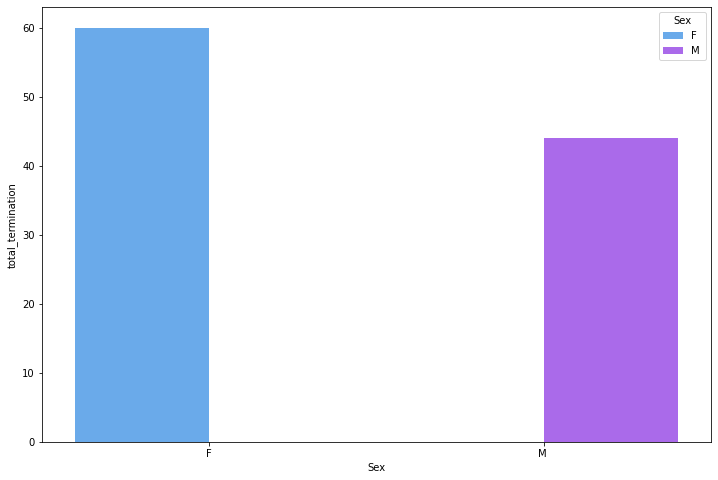

In [8]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

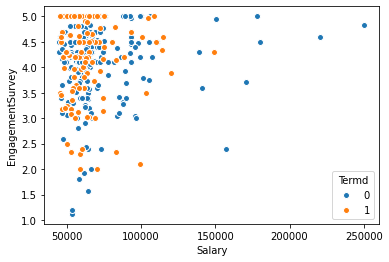

In [9]:
#code here

plt.scatter(x=data['Salary'].loc[(data.Termd==0)], y=data['EngagementSurvey'].loc[(data.Termd==0)], marker ='o',label= '0',edgecolors='white')
plt.scatter(x=data['Salary'].loc[(data.Termd==1)], y=data['EngagementSurvey'].loc[(data.Termd==1)], marker ='o',label= '1',edgecolors='white')
plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')
plt.legend(title="Termd")

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

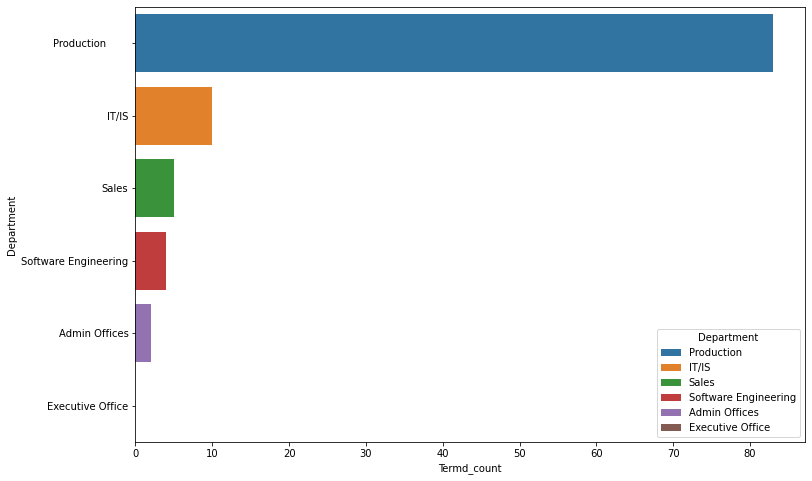

In [10]:
#code here
term = data.groupby(by=['Department'])\
                        .agg(Termd_count=('Termd','sum')).reset_index().\
                        sort_values(by = 'Termd_count',ascending = False)

f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.barplot(x='Termd_count', y='Department', hue="Department",data=term, palette='tab10',dodge=False)

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

([<matplotlib.patches.Wedge at 0x7f69079472b0>,
 [Text(6.735557395310444e-17, 1.1, 'Production Technician I'),
  Text(-0.7778174593052025, -0.7778174593052023, 'Production Technician II'),
  Text(0.1655109565392882, -1.0874769529812804, 'Production Manager'),
  Text(0.4514540959314608, -1.003089826120626, 'Area Sales Manager'),
  Text(0.6783907762616203, -0.8659018158447044, 'Software Engineer'),
  Text(0.8450173526450935, -0.7042341043493121, 'Database Administrator'),
  Text(0.9413594146447618, -0.5690715705951859, 'Administrative Assistant'),
  Text(0.9889969395563057, -0.4815444460776816, 'Sr. DBA'),
  Text(1.0162674993104102, -0.42095174289384485, 'Network Engineer'),
  Text(1.039829808894119, -0.3588230323365827, 'Data Analyst'),
  Text(1.0595978919886109, -0.29538501534995354, 'Data Analyst '),
  Text(1.0754996169970839, -0.23086917039554233, 'Principal Data Architect'),
  Text(1.0874769602451484, -0.16551090881259756, 'Enterprise Architect'),
  Text(1.0954862177029399, -0.09954

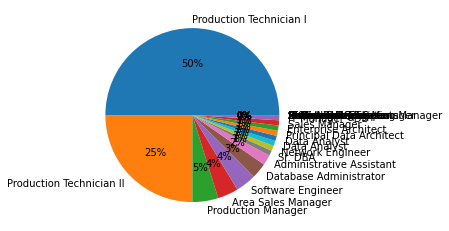

In [11]:
#code here
term = data.groupby(by=['Position'])\
                        .agg(total_termination=('Termd','sum')).reset_index().\
                        sort_values(by = 'total_termination',ascending = False)
plt.pie(term['total_termination'],
        autopct="%1.0f%%",
        textprops=dict(color="black", size=10),
        labels=term['Position'])

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd 
(5 points)

<Axes: xlabel='Salary', ylabel='MaritalDesc'>

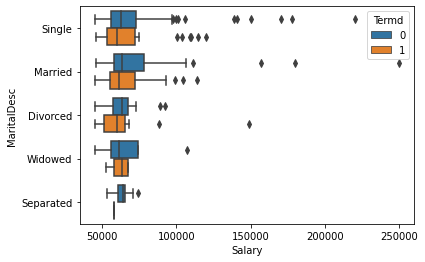

In [12]:
#code here

plt.figure(figsize=(6,4))
sns.boxplot(y='MaritalDesc',x='Salary',hue='Termd',data=data)

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


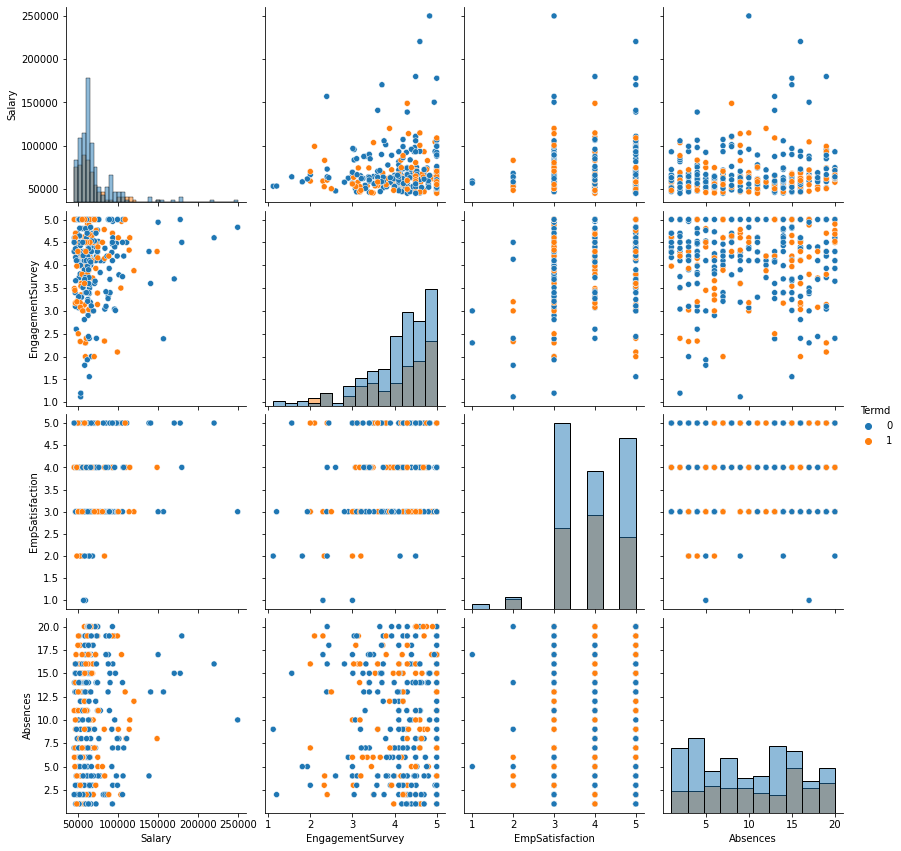

In [13]:
#code here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [17]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)


In [14]:
#code here
from datetime import datetime, date

dob = data['DOB']
df = pd.DataFrame(data = dob)

def dob_date(born):
  born = datetime.strptime(born, "%m/%d/%y").date()
  return born.strftime("%Y-%m-%d")
  
def age(born):
  born = datetime.strptime(born, "%m/%d/%y").date()
  today=date.today()
  return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
df['DOB_date'] = df['DOB'].apply(dob_date)
df['Age'] = df['DOB'].apply(age)
display(df)
data['DOB_date'] = df['DOB_date']
data['Age'] = df['Age']

,DOB,DOB_date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33
...,...,...,...
306,05/11/85,1985-05-11,37
307,05/04/82,1982-05-04,40
308,08/30/79,1979-08-30,43
309,02/24/79,1979-02-24,44


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler


In [15]:
#code here
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y = np.array(data['Salary']).reshape(-1,1)
scaler.fit(y)
data['Salary_minmax'] = scaler.transform(y)
data[['Salary','Salary_minmax']]

,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                            object
DateofTerm

In [16]:
#code here
data.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [ ]:
#Setelah diubah category

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [17]:
#code here
data[['Position','State','DOB','Sex','MaritalDesc','CitizenDesc',\
             'HispanicLatino','RaceDesc','DateofHire','DateofTermination','TermReason',\
             'EmploymentStatus','Department','ManagerName','RecruitmentSource',\
             'PerformanceScore','LastPerformanceReview_Date']] \
             = data[['Position','State','DOB','Sex','MaritalDesc','CitizenDesc',\
             'HispanicLatino','RaceDesc','DateofHire','DateofTermination','TermReason',\
             'EmploymentStatus','Department','ManagerName','RecruitmentSource',\
             'PerformanceScore','LastPerformanceReview_Date']].astype('category')
data.dtypes

Employee_Name                   object
EmpID                            int64
MarriedID                        int64
MaritalStatusID                  int64
GenderID                         int64
EmpStatusID                      int64
DeptID                           int64
PerfScoreID                      int64
FromDiversityJobFairID           int64
Salary                           int64
Termd                            int64
PositionID                       int64
Position                      category
State                         category
Zip                              int64
DOB                           category
Sex                           category
MaritalDesc                   category
CitizenDesc                   category
HispanicLatino                category
RaceDesc                      category
DateofHire                    category
DateofTermination             category
TermReason                    category
EmploymentStatus              category
Department               

In [ ]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder


Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [32]:
#code here
from sklearn.preprocessing import LabelEncoder
labelenc= LabelEncoder()
data['RecruitmentSource'] = labelenc.fit_transform(data['RecruitmentSource'])
data['PerformanceScore'] = labelenc.fit_transform(data['PerformanceScore'])
data.dtypes

Employee_Name                   object
EmpID                            int64
MarriedID                        int64
MaritalStatusID                  int64
GenderID                         int64
EmpStatusID                      int64
DeptID                           int64
PerfScoreID                      int64
FromDiversityJobFairID           int64
Salary                           int64
Termd                            int64
PositionID                       int64
Position                      category
State                         category
Zip                              int64
DOB                           category
Sex                           category
MaritalDesc                   category
CitizenDesc                   category
HispanicLatino                category
RaceDesc                      category
DateofHire                    category
DateofTermination             category
TermReason                    category
EmploymentStatus              category
Department               

In [ ]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)


#Independent Variable (feature)


,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,0,4,5.00


In [33]:
#code here
data_x = data[['MarriedID','MaritalStatusID','GenderID','DeptID','PerfScoreID',\
               'PositionID','Age','RecruitmentSource','PerformanceScore','Salary_minmax',\
               'Absences','SpecialProjectsCount','EmpSatisfaction','EngagementSurvey']].copy()
data_y = data.Termd
data_x.head()

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,0,4,5.00


In [34]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=28)

In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)

Accuracy  61.90%
Precision : 42.86%
Recall : 13.04%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(tol=0.1, C=1, max_iter=1000,penalty=None)

train_model = model.fit(X_train, y_train)

y_pred = train_model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Accuracy  %.2f%%" % (accuracy * 100.0))
print("Precision : %.2f%%" % (precision* 100.0))
print("Recall : %.2f%%" % (recall * 100.0))

Accuracy  52.38%
Precision : 50.00%
Recall : 16.67%


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br> 
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

In [26]:
#19 (sebelum PerformanceScore diubah menggunakan LabelEncoder)
data.filter(["ManagerName", "PerformanceScore"]).\
loc[(data["PerformanceScore"]=="PIP")].\
sort_values(by = "ManagerName")

,ManagerName,PerformanceScore
69,Amy Dunn,PIP
90,Amy Dunn,PIP
112,Brannon Miller,PIP
188,Brannon Miller,PIP
263,Brannon Miller,PIP
307,Brannon Miller,PIP
67,John Smith,PIP
72,John Smith,PIP
205,Kissy Sullivan,PIP
95,Lynn Daneault,PIP


In [27]:
data.filter(["ManagerName", "PerformanceScore"]).\
loc[(data["PerformanceScore"]=="Needs Improvement")].\
sort_values(by = "ManagerName")

,ManagerName,PerformanceScore
86,Alex Sweetwater,Needs Improvement
215,Amy Dunn,Needs Improvement
73,Brannon Miller,Needs Improvement
283,David Stanley,Needs Improvement
258,Debra Houlihan,Needs Improvement
297,Elijiah Gray,Needs Improvement
85,Elijiah Gray,Needs Improvement
137,Janet King,Needs Improvement
54,Janet King,Needs Improvement
190,Jennifer Zamora,Needs Improvement


In [28]:
data.filter(["ManagerName", "PerformanceScore"]).\
loc[(data["PerformanceScore"]=="Fully Meets")].\
sort_values(by = "ManagerName")

,ManagerName,PerformanceScore
6,Alex Sweetwater,Fully Meets
66,Alex Sweetwater,Fully Meets
245,Alex Sweetwater,Fully Meets
180,Alex Sweetwater,Fully Meets
285,Alex Sweetwater,Fully Meets
...,...,...
276,Webster Butler,Fully Meets
65,Webster Butler,Fully Meets
30,Webster Butler,Fully Meets
124,Webster Butler,Fully Meets


In [25]:
data.filter(["ManagerName", "PerformanceScore"]).\
loc[(data["PerformanceScore"]=="Exceeds")].\
sort_values(by = "ManagerName")

,ManagerName,PerformanceScore
212,Alex Sweetwater,Exceeds
274,Alex Sweetwater,Exceeds
5,Amy Dunn,Exceeds
125,Amy Dunn,Exceeds
106,Amy Dunn,Exceeds
304,Brannon Miller,Exceeds
111,Brannon Miller,Exceeds
201,Brannon Miller,Exceeds
145,Brannon Miller,Exceeds
237,Brannon Miller,Exceeds


19. 

No, the performance score of an employee isn't influenced by the person who they work for (the manager). Based on the tables above, 7 employees who work for Brannon Miller achieved "Exceeds" performance score, but there are also 4 other employees who work for the same manager Brannon Miller that got "PIP" performance score. Another example is three employees who have Amy Dunn as their manager achieved "Exceeds" performance score, but there are two other employees with the same manager got "PIP" performance score.

In [29]:
#20. (sebelum RecruitmentSource diubah menggunakan LabelEncoder)
data[['RecruitmentSource','Termd']].\
loc[data.Termd == 0].\
groupby(['RecruitmentSource']).\
agg(termd_count0=('Termd','count'))

,termd_count0
RecruitmentSource,
CareerBuilder,12
Diversity Job Fair,13
Employee Referral,26
Google Search,19
Indeed,66
LinkedIn,58
On-line Web application,0
Other,1
Website,12


In [31]:

data[['RecruitmentSource','Termd']].\
groupby(['RecruitmentSource']).\
value_counts(normalize=True)

RecruitmentSource        Termd
CareerBuilder            0        0.521739
                         1        0.478261
Diversity Job Fair       1        0.551724
                         0        0.448276
Employee Referral        0        0.838710
                         1        0.161290
Google Search            1        0.612245
                         0        0.387755
Indeed                   0        0.758621
                         1        0.241379
LinkedIn                 0        0.763158
                         1        0.236842
On-line Web application  1        1.000000
                         0        0.000000
Other                    1        0.500000
                         0        0.500000
Website                  0        0.923077
                         1        0.076923
dtype: float64

20. The best recruiting sources if we want to ensure a low ratio of termination are the ones with high ratio of not getting terminated (Termd = 0). 
Based on the table above, the BEST recruiting source is Website with ratio of Termd=0 is 0.923, SECOND best is Employee Referral with 0.838 ratio, THIRD best is LinkedIn with 0.763 ratio.